In [4]:
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [53]:
s1f1=np.loadtxt(open("FP_set1_trail1.csv", "rb"), delimiter=",")
s1f1[1]=s1f1[1]*1000
splines1f1= inter.InterpolatedUnivariateSpline(s1f1[0],s1f1[1],k=5)

Text(0.5, 1.0, 'Piezo Voltage vs Lock In')

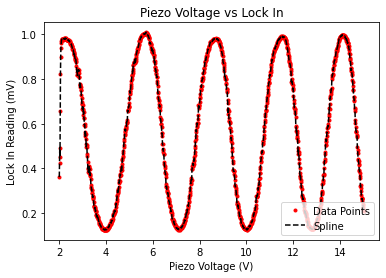

In [54]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f1[0],s1f1[1], 'r.', label="Data Points")
ax.plot(s1f1[0],splines1f1(s1f1[0]),'k--', label="Spline")
ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Piezo Voltage vs Lock In")

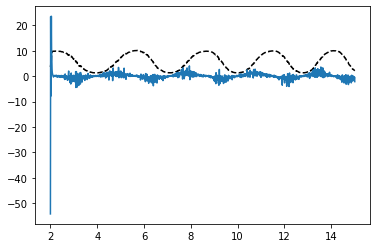

In [61]:
# Calculate x for max
firstdevs1f1=splines1f1.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f1[0],10*splines1f1(s1f1[0]),'k--', label="Spline")
ax.plot(s1f1[0],firstdevs1f1(s1f1[0]), '', label="Data Points")

In [81]:
firstpeak=opt.brentq(firstdevs1f1,4.6,6)
secondpeak=opt.brentq(firstdevs1f1,8,9)
thirdpeak= opt.brentq(firstdevs1f1,11.5,12)
fourthpeak= opt.brentq(firstdevs1f1,13,15)

print(f"Peaks are: {firstpeak};{secondpeak};{thirdpeak};{fourthpeak}")

Peaks are: 5.560980283618862;8.652669135926699;11.587239669126214;14.331936408627133


In [87]:
firstwhm=opt.brentq(lambda x: splines1f1(x)-splines1f1(firstpeak)/2,6,7)-opt.brentq(lambda x: splines1f1(x)-splines1f1(firstpeak)/2,4,6)
secondwhm=opt.brentq(lambda x: splines1f1(x)-splines1f1(secondpeak)/2,9,10)-opt.brentq(lambda x: splines1f1(x)-splines1f1(secondpeak)/2,7,8)
thirdwhm=opt.brentq(lambda x: splines1f1(x)-splines1f1(secondpeak)/2,12,13)-opt.brentq(lambda x: splines1f1(x)-splines1f1(secondpeak)/2,10,11)

In [88]:
print(firstwhm,secondwhm,thirdwhm)

1.6694409496793563 1.5828999144284817 1.516078055357136


In [92]:
finess=np.array([(secondpeak-firstpeak)/firstwhm,(thirdpeak-secondpeak)/secondwhm,(fourthpeak-thirdpeak)/thirdwhm])
finess

array([1.85193064, 1.85392046, 1.81039276])

$$ Finess=F_i = \frac{\pi \sqrt{\frac{4R}{(1-R)^2}}}{2} $$


$$R=\frac{2 F_i^2 + π^2 - π \sqrt{4 F_i^2 + π^2}}{(2 F_i^2)} $$

In [93]:
r= lambda f_i: (2*f_i**2+np.pi**2-np.pi*np.sqrt(4*f_i**2+np.pi**2))/(2*f_i**2)

In [94]:
r(finess)

array([0.21444084, 0.21473887, 0.20819879])